# 問題1：データの可視化

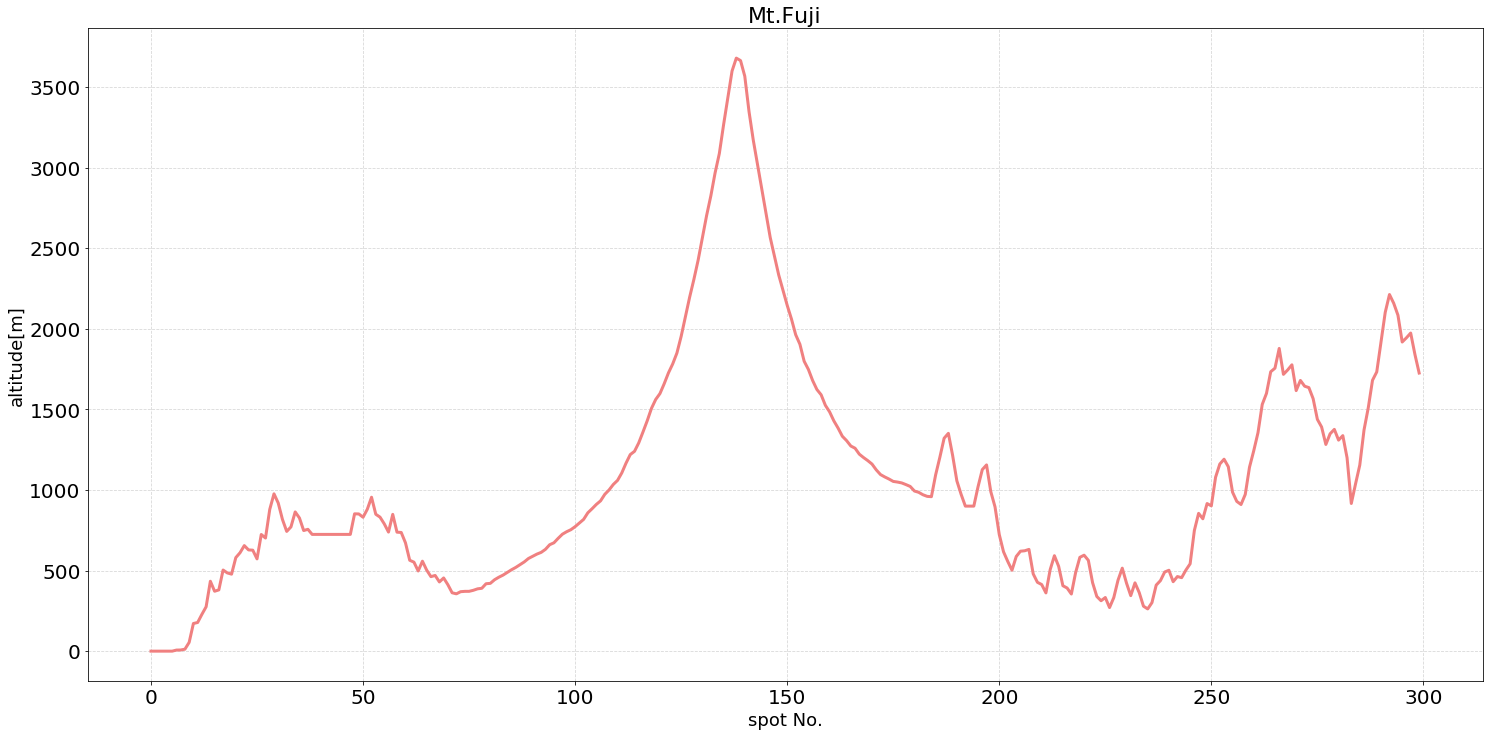

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_path = "./mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

### Create graph ###

FIGSIZE_X = 25
FIGSIZE_Y = 12

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph in two columns
ax = fig.add_subplot(111)

# Set label size
ax.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label
ax.set_title("Mt.Fuji", fontsize=22)
ax.set_xlabel("spot No.", fontsize=18)
ax.set_ylabel("altitude[m]", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)

# Plot ax
plt.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")

# Display graph
plt.show()

###

___
# 問題2：ある地点の勾配を計算する関数を作成

In [7]:
def calc_gradient(spot_no=1):
    
    delta_x = fuji[spot_no, 0] - fuji[spot_no-1, 0]
    delta_y = fuji[spot_no, 3] - fuji[spot_no-1, 3]
    
    gradient = delta_y/delta_x
    
    return gradient

# Check some samples
grad = calc_gradient(40)
print(grad)
grad = calc_gradient(100)
print(grad)
grad = calc_gradient(140)
print(grad)
grad = calc_gradient(170)
print(grad)
grad = calc_gradient(185)
print(grad)

0.0
18.90000000000009
-97.13999999999987
-21.470000000000027
135.83999999999992


___
# 問題3：移動先の地点を計算する関数を作成

In [46]:
DEFAULT_HYPER_PARAMETER = 0.02

def calc_move_point(spot_no=1, hyper_param=DEFAULT_HYPER_PARAMETER):
    
    move_point = np.round(fuji[spot_no, 0] - hyper_param*calc_gradient(spot_no), 0)
    
    if move_point < 0:
        move_point = 0
    
    return int(move_point)

# Current point = 100
move_point = calc_move_point(100)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)

print("\n----------------------------\n")

# Current point = 170
move_point = calc_move_point(170)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)

print("\n----------------------------\n")

# Current point = 136(Top)
move_point = calc_move_point(136)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)

print("\n----------------------------\n")

# Current point = 45
move_point = calc_move_point(45)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)
move_point = calc_move_point(move_point)
print(move_point)

100
100
100
100

----------------------------

170
170
170
170

----------------------------

133
130
127
125

----------------------------

45
45
45
45


___
# 問題4：山を下る関数を作成

In [17]:
def climb_down_mountain(spot_no, point_records):
    
    point_records.append(int(fuji[spot_no, 0]))
    next_point = calc_move_point(point_records[-1])
    
    if next_point > len(fuji):
        next_point = len(fuji)-1
    
#     print(fuji[point_records[-1], 3])
#     print(fuji[next_point, 3])

    # Whether next is higher than current
    if fuji[point_records[-1], 3] < fuji[next_point, 3]:
        pass
    # Whether next spot is same to current spot
    elif point_records[-1] == next_point:
        pass
    else:
        climb_down_mountain(next_point, point_records)
    
    return point_records

point_records = []
point_records = climb_down_mountain(136, point_records)
print(point_records)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73]


___
# 問題5：下山過程の可視化

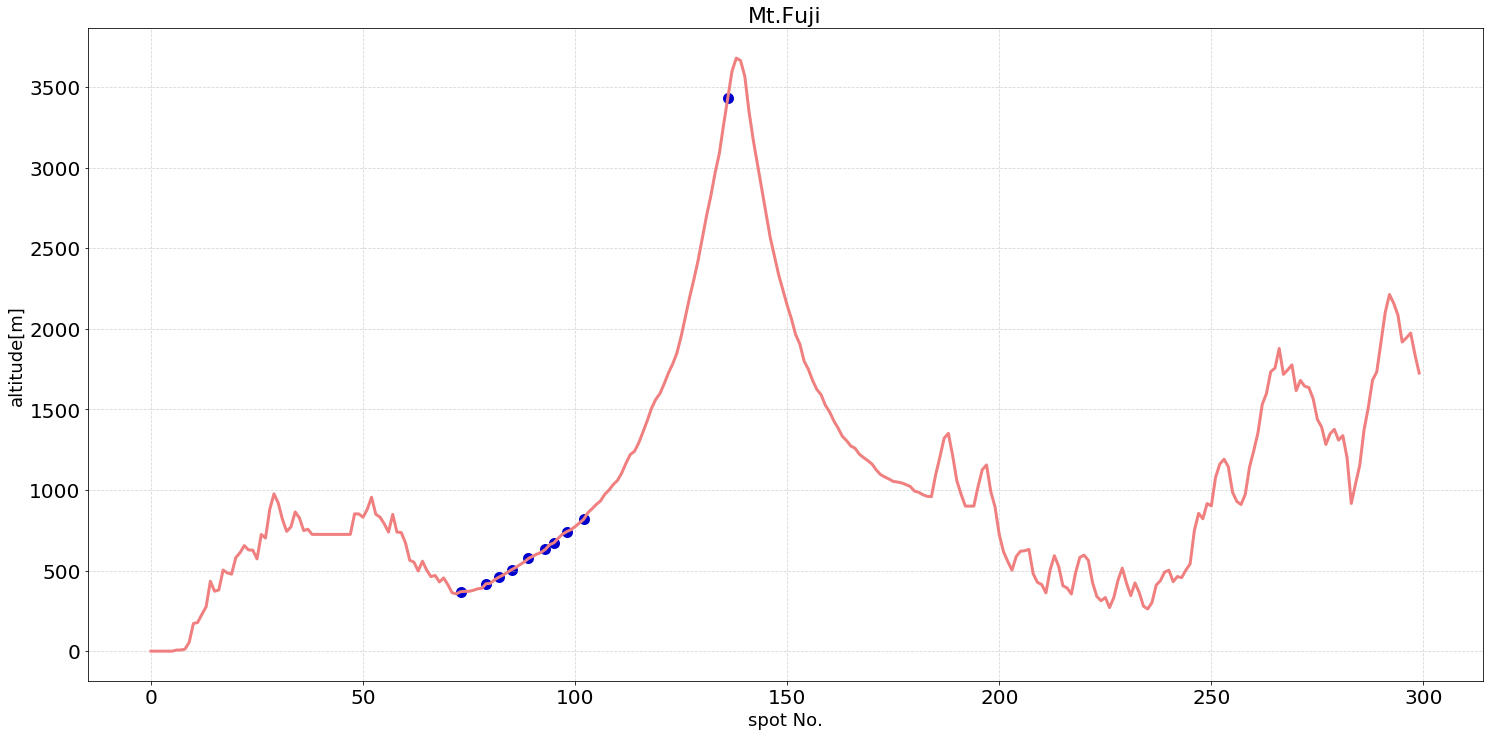

In [140]:
altitude_records = []
for idx in point_records:
    altitude_records.append(fuji[idx, 3])

### Create graph ###

FIGSIZE_X = 25
FIGSIZE_Y = 12

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph
ax = fig.add_subplot(111)

# Set label size
ax.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label
ax.set_title("Mt.Fuji", fontsize=22)
ax.set_xlabel("spot No.", fontsize=18)
ax.set_ylabel("altitude[m]", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)

# Plot
plt.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
plt.scatter(point_records, altitude_records, lw=5, color="mediumblue")

# Display graph
plt.show()

###

___
# 問題6：初期値の変更

[724.5]
[3171.53, 1043.91, 1033.52, 993.63]
[595.53, 354.39, 312.76]
[1616.81]


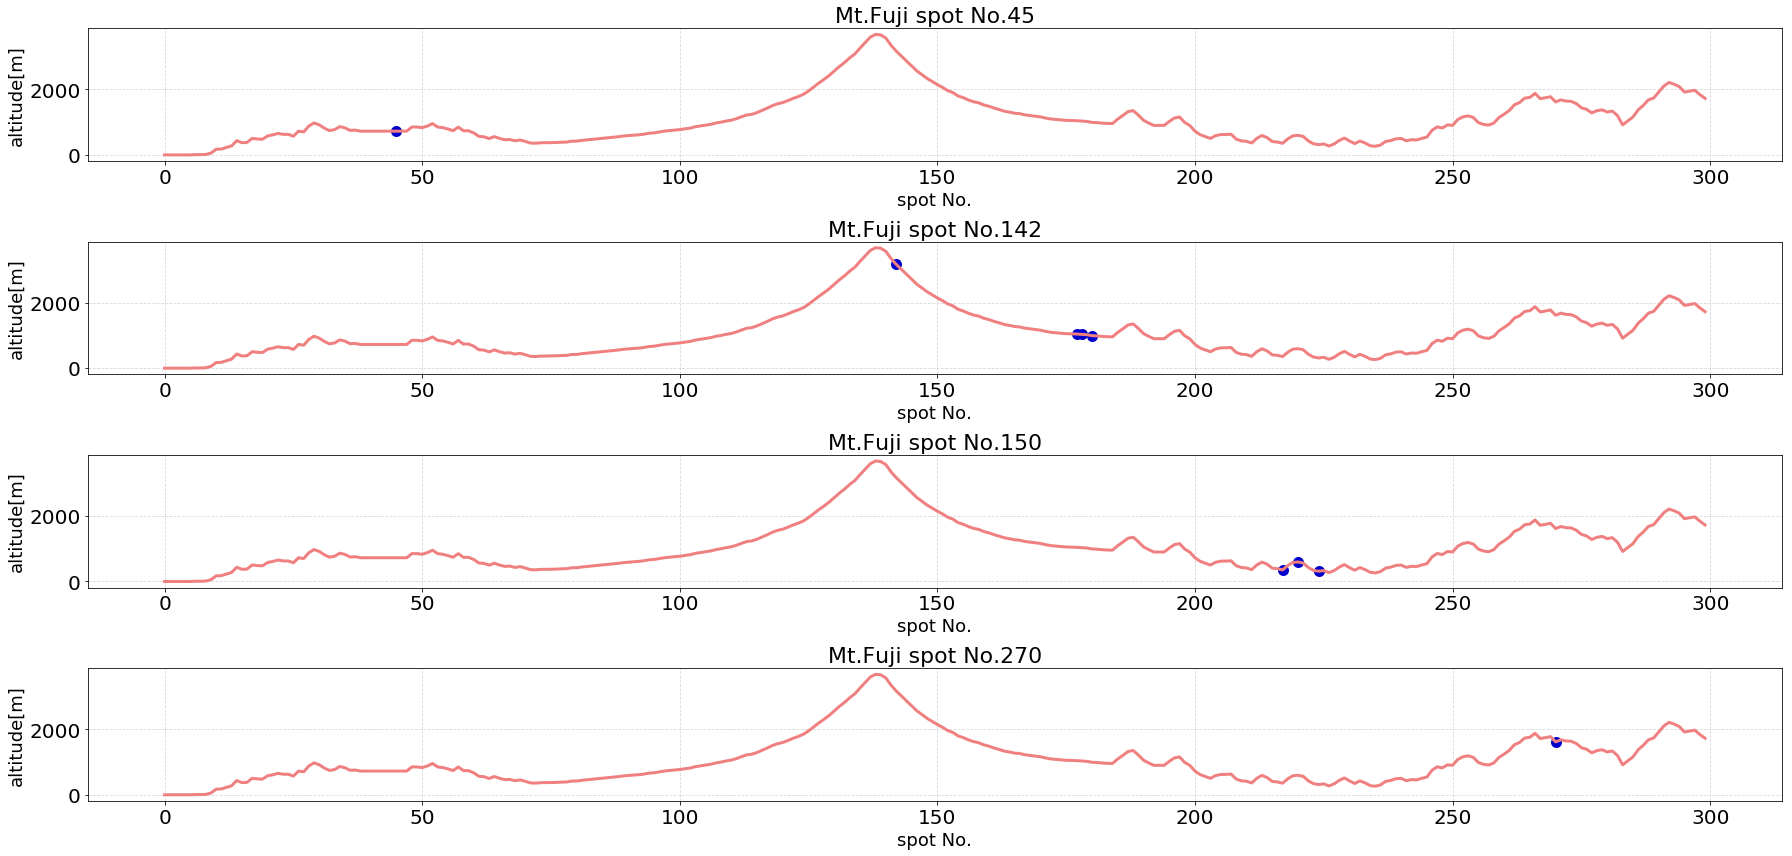

In [34]:
master_point_records = []

for point in range(300):
    point_records = []
    point_records = climb_down_mountain(point, point_records)
    master_point_records.append(point_records)
    
# print(master_point_records[45])
sample1 = master_point_records[45]
sample2 = master_point_records[142]
sample3 = master_point_records[220]
sample4 = master_point_records[270]

sample1_alt = []
sample2_alt = []
sample3_alt = []
sample4_alt = []

for point in sample1:
    sample1_alt.append(fuji[point, 3])
    
for point in sample2:
    sample2_alt.append(fuji[point, 3])
    
for point in sample3:
    sample3_alt.append(fuji[point, 3])
    
for point in sample4:
    sample4_alt.append(fuji[point, 3])
    
print(sample1_alt)
print(sample2_alt)
print(sample3_alt)
print(sample4_alt)
    
    
### Create graph ###

FIGSIZE_X = 25
FIGSIZE_Y = 12

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph
ax = fig.add_subplot(411)
bx = fig.add_subplot(412)
cx = fig.add_subplot(413)
dx = fig.add_subplot(414)

# Set label size
ax.tick_params(labelsize=20)
bx.tick_params(labelsize=20)
cx.tick_params(labelsize=20)
dx.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label
ax.set_title("Mt.Fuji spot No.45", fontsize=22)
ax.set_xlabel("spot No.", fontsize=18)
ax.set_ylabel("altitude[m]", fontsize=18)

bx.set_title("Mt.Fuji spot No.142", fontsize=22)
bx.set_xlabel("spot No.", fontsize=18)
bx.set_ylabel("altitude[m]", fontsize=18)

cx.set_title("Mt.Fuji spot No.150", fontsize=22)
cx.set_xlabel("spot No.", fontsize=18)
cx.set_ylabel("altitude[m]", fontsize=18)

dx.set_title("Mt.Fuji spot No.270", fontsize=22)
dx.set_xlabel("spot No.", fontsize=18)
dx.set_ylabel("altitude[m]", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)
bx.grid(which='major', linestyle='--', alpha=0.5)
cx.grid(which='major', linestyle='--', alpha=0.5)
dx.grid(which='major', linestyle='--', alpha=0.5)

# Plot
ax.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
ax.scatter(sample1, sample1_alt, lw=5, color="mediumblue")

bx.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
bx.scatter(sample2, sample2_alt, lw=5, color="mediumblue")

cx.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
cx.scatter(sample3, sample3_alt, lw=5, color="mediumblue")

dx.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
dx.scatter(sample4, sample4_alt, lw=5, color="mediumblue")

# Prevent overlap graphs
plt.tight_layout()

# Display graph
plt.show()

###

___
# 問題7：（アドバンス問題）ハイパーパラメータの変更

[136, 133, 130, 127, 125, 123, 122, 121, 120, 119, 118, 116, 115, 114]


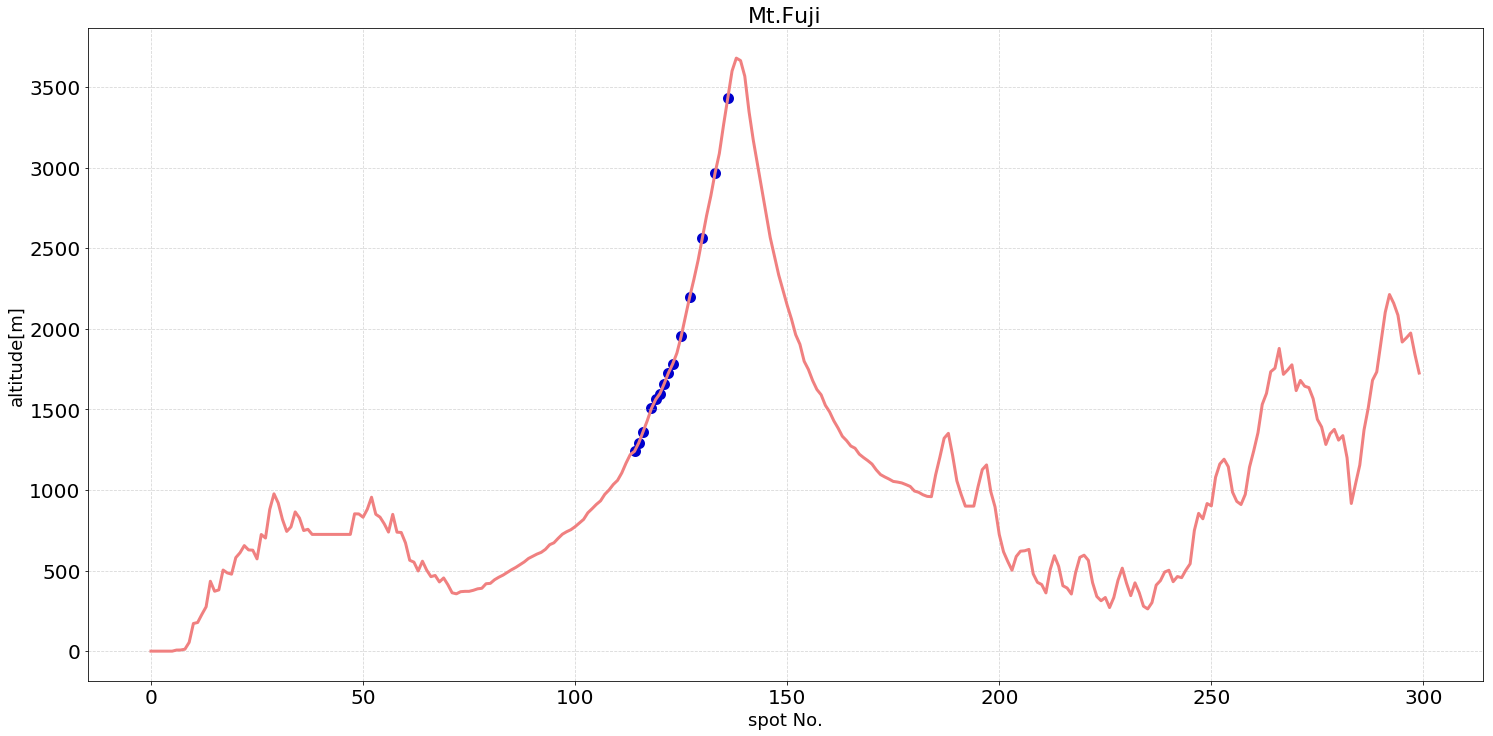

In [43]:
### hyper parameter = 0.02 ###

point_records = []
point_records = climb_down_mountain(136, point_records)
print(point_records)

altitude_records = []
for idx in point_records:
    altitude_records.append(fuji[idx, 3])

### Create graph ###

FIGSIZE_X = 25
FIGSIZE_Y = 12

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph
ax = fig.add_subplot(111)

# Set label size
ax.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label
ax.set_title("Mt.Fuji", fontsize=22)
ax.set_xlabel("spot No.", fontsize=18)
ax.set_ylabel("altitude[m]", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)

# Plot
plt.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
plt.scatter(point_records, altitude_records, lw=5, color="mediumblue")

# Display graph
plt.show()

###
    
#[136, 102, 98, 95, 93, 89, 85, 82, 79, 73] as hyper parameter = 0.2

[136, 69]


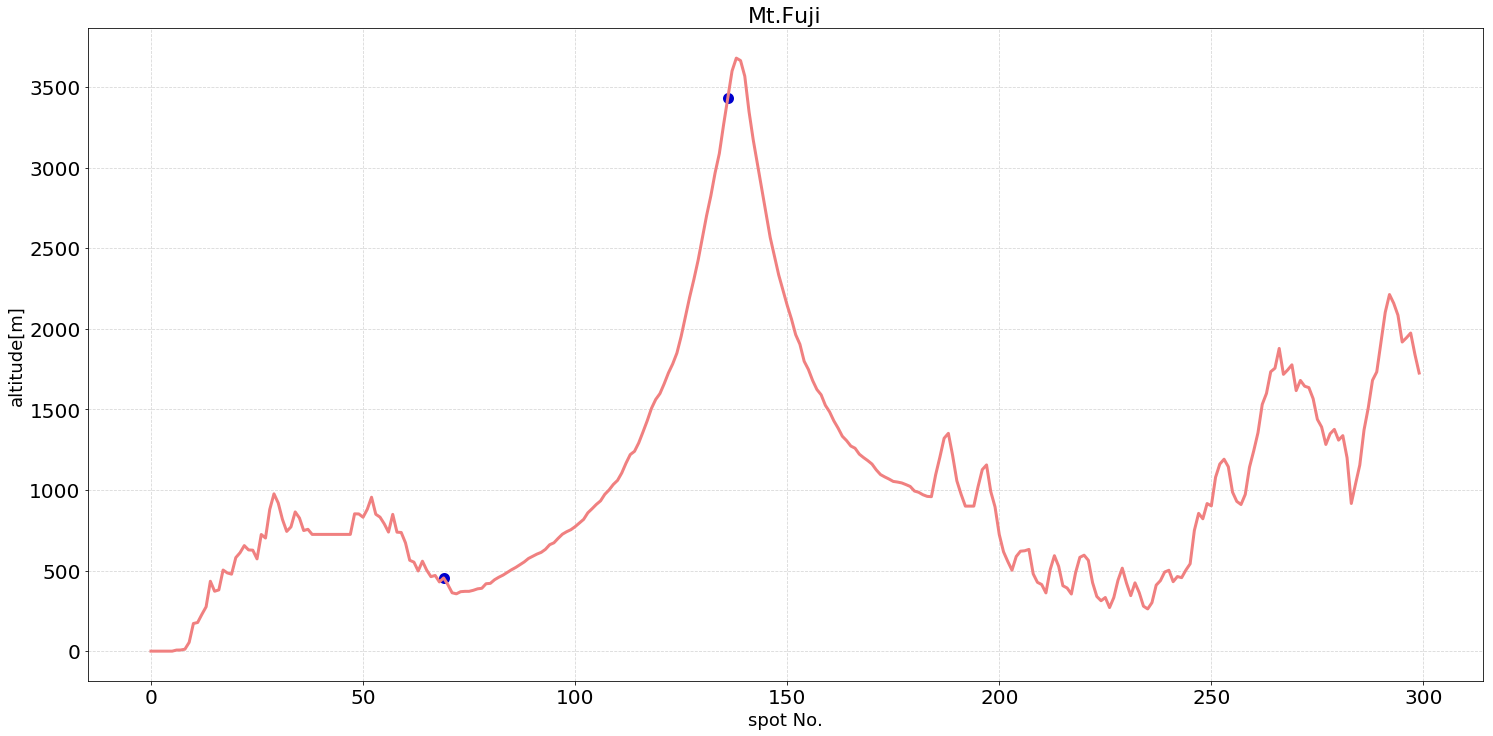

In [45]:
### hyper parameter = 0.4 ###

point_records = []
point_records = climb_down_mountain(136, point_records)
print(point_records)

altitude_records = []
for idx in point_records:
    altitude_records.append(fuji[idx, 3])

### Create graph ###

FIGSIZE_X = 25
FIGSIZE_Y = 12

# Create Figure instance for setting figure size
fig = plt.figure(figsize=(FIGSIZE_X, FIGSIZE_Y))

# Arrange graph
ax = fig.add_subplot(111)

# Set label size
ax.tick_params(labelsize=20)

# Set graph title, x-axis label and y-axis label
ax.set_title("Mt.Fuji", fontsize=22)
ax.set_xlabel("spot No.", fontsize=18)
ax.set_ylabel("altitude[m]", fontsize=18)

# Plot grid
ax.grid(which='major', linestyle='--', alpha=0.5)

# Plot
plt.plot(fuji[:, :1], fuji[:, 3:4], lw=3, color="lightcoral")
plt.scatter(point_records, altitude_records, lw=5, color="mediumblue")

# Display graph
plt.show()

###

#[136, 102, 98, 95, 93, 89, 85, 82, 79, 73] as hyper parameter = 0.2